# Quarter symmetric off-axis PSFs
In previous examples I used a YIP that had a radially symmetric off-axis PSF. However, some YIP will have the off-axis PSFs encoded as a quarter symmetric response. I'm not going to walk through this with quite as much detail, so if you are interested in the guts I'd encourage you to look more at the [radially symmetric page](RadiallySymmetric.ipynb).

To start, lets load a quarter symmetric coronagraph design.

In [1]:
from pathlib import Path

# Path to the yield input package directory
yip_path = Path("../../input/ApodSol_APLC")

In [2]:
# Loading the offax_psf files directly
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import numpy as np
from lod_unit import (
    lod,  # NOTE: `lod` is an astropy unit for lambda/D, I defined it enough that I made it a package
)

offax_psf_data = pyfits.getdata(Path(yip_path, "offax_psf.fits"))
offax_psf_offsets_list = pyfits.getdata(Path(yip_path, "offax_psf_offset_list.fits"))

## The offsets
In the radially symmetric case our offsets were all along the x axis, but here we can plot the offsets and see that they have significant coverage of the first quadrant.

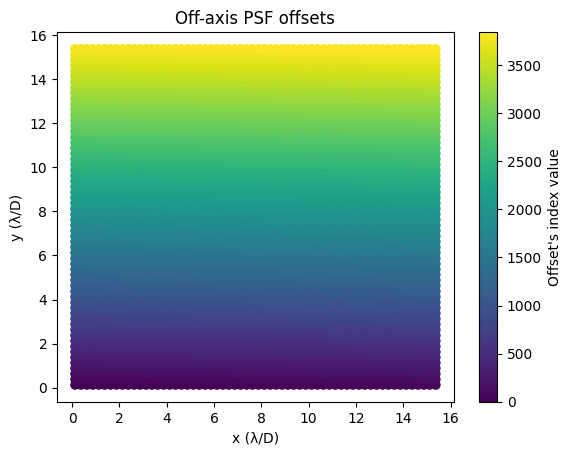

In [4]:
scatter = plt.scatter(
    *offax_psf_offsets_list, c=np.arange(offax_psf_offsets_list.shape[1])
)
plt.title("Off-axis PSF offsets")
plt.xlabel(f"x ({lod})")
plt.ylabel(f"y ({lod})")
plt.colorbar(scatter, label="Offset's index value")
plt.show()

## The PSFs
Here we plot a set of the PSFs included in the yield input package (with no interpolation).

In [8]:
# Utility functions
def set_up_plot():
    rows, cols = 3, 4
    base_size = 3
    fig, axes = plt.subplots(
        nrows=rows, ncols=cols, figsize=(base_size * cols, base_size * rows)
    )
    return fig, axes


def ax_labels_and_ticks(ax):
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("y (pixel)")
    else:
        ax.set_yticks([])
    if ax.get_subplotspec().is_last_row():
        ax.set_xlabel("x (pixel)")
    else:
        ax.set_xticks([])
    return ax

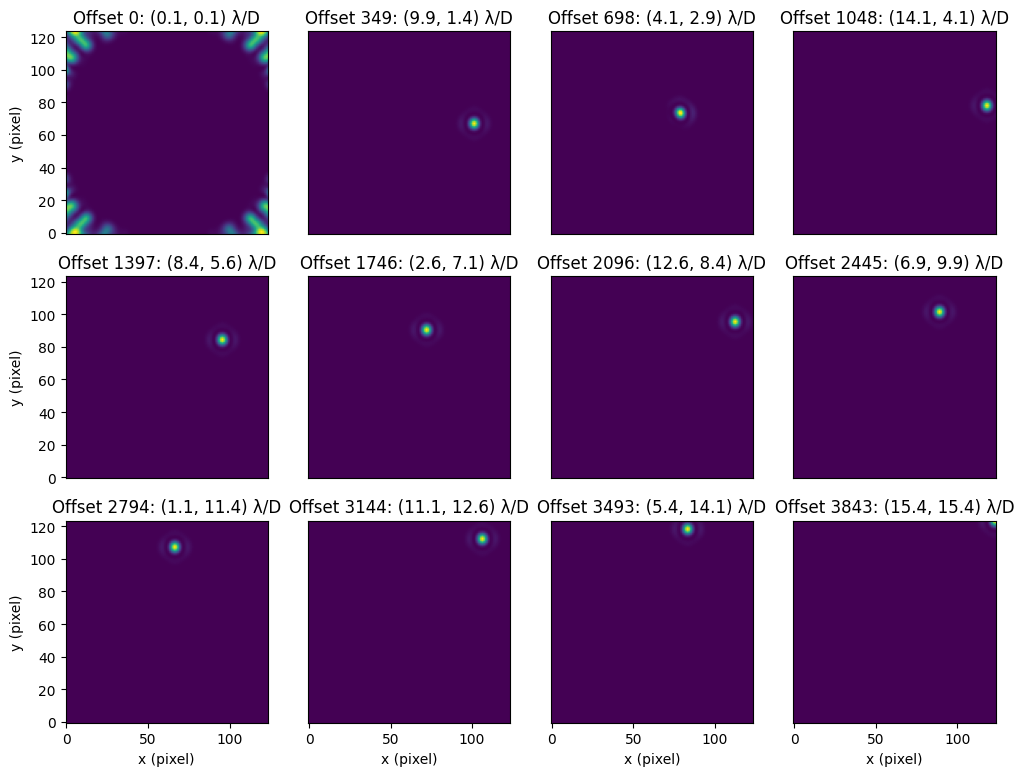

In [12]:
### Plotting PSF data
fig, axes = set_up_plot()

# Choosing the PSF offset index values
offsets = np.linspace(
    0, len(offax_psf_offsets_list.T) - 1, axes.shape[0] * axes.shape[1], dtype=int
)

# Loop through and plot the PSFs
for ax, offset in zip(axes.flatten(), offsets):
    # Get the x, y values of the offset from the offset list
    offset_x, offset_y = offax_psf_offsets_list.T[offset]

    # Load the PSF from the provided data
    psf = offax_psf_data[offset]

    # Plot the PSF data at the current offset
    ax.imshow(psf, origin="lower")

    # Make the plot pretty
    ax.set_title(f"Offset {offset}: ({offset_x:.1f}, {offset_y:.1f}) {lod}")
    ax = ax_labels_and_ticks(ax)
plt.show()

## Using yippy
As with the radially symmetric PSFs, we use the `coro.offax(x,y)` call to evaluate a PSF at a given $(x,y)$ value.

In [5]:
# yippy has a lot of logging messages, disabling to keep this documentation clean
import logging

from yippy import Coronagraph

yippy_logger = logging.getLogger("yippy")
yippy_logger.setLevel(logging.ERROR)

In [6]:
coro = Coronagraph(yip_path)

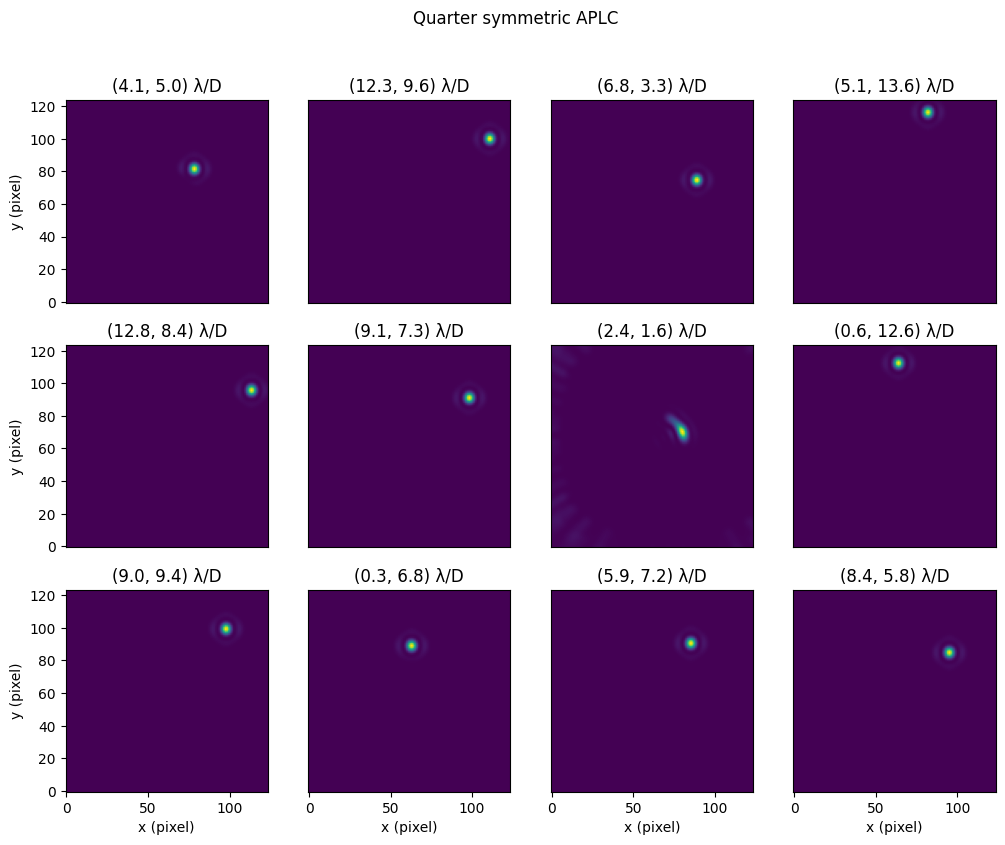

In [11]:
### Plotting PSF data
fig, axes = set_up_plot()

# Choosing the PSF offset index values
n_plots = axes.shape[0] * axes.shape[1]

x_offsets = np.random.uniform(low=0, high=14, size=(n_plots,)) * lod
y_offsets = np.random.uniform(low=0, high=14, size=(n_plots,)) * lod

# Loop through and plot the PSFs
for ax, x, y in zip(axes.flatten(), x_offsets, y_offsets):
    # USE YIPPY TO GENERATE THE PSF
    ######################
    psf = coro.offax(x, y)
    ######################

    # Plot the PSF data at the current offset
    ax.imshow(psf, origin="lower")

    # Make the plot pretty
    ax.set_title(f"({x.value:.1f}, {y.value:.1f}) {lod}")
    ax = ax_labels_and_ticks(ax)
fig.suptitle("Quarter symmetric APLC")
plt.show()